# Hammett Plot for pH = 1.0 ($\log{k_{H^+}}$ vs $\sigma$)

This workbook imports the data set of kinetic parameters for the rearrangement described in the paper below. It then generates a Hammett plot for the reaction indicated in the title.

The data being pklotted is from 'On the Rearrangement in Dioxane/Water of (*Z*)-Arylhydrazones of 5-Amino-3-benzoyl-1,2,4-oxadiazole into (2-Aryl-5-phenyl-2*H*-1,2,3-triazol-4-yl)ureas: Substituent Effects on the Different Reaction Pathways." F. D'Anna, V. Frenna, G. Macaluso, S. Marullo, S. Morganti, V. Pace, D. Spinelli, R. Spisani, C. Tavani, *J. Org. Chem.*, **2006**, *71*, 5616-5624. https://doi.org/10.1021/jo0605849

The data is found in tables within the supplementary material at https://ndownloader.figstatic.com/files/4775281


## Setup Tools and Read Data Table

The libraries are imported and any functions defined

In [1]:
##############################################################
### Set up libraries and global variables
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_23/data/"
#github_location = "./data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

result_file_name = "results.csv"


## Read Data and make Plots

We now have a data set of kinetic parameters and substituent parameters.  We can plot the log of the rate constants *vs* the Hammett $\sigma$ values and draw conclusion based on the results.

,sigma,s_plus,s_minus,file,molecule,Ka,kOH,kH2O,kH,kHKa,Ka_sd,kOH_sd,kH2O_sd,kH_sd,kHKa_sd
Substituent,,,,,,,,,,,,,,,
p-OCH3,-0.27,-0.78,-0.26,1c-data.csv,1c,0.4682,2.177,1.245000e-05,0.002322,0.004959,0.07780,0.06324,4.121000e-07,0.000304,0.000260
p-CH3,-0.17,-0.31,-0.17,1e-data.csv,1e,0.4525,1.564,1.197000e-05,0.001956,0.004324,0.05586,0.03957,3.419000e-07,0.000181,0.000194
m-CH3,-0.07,-0.07,-0.07,1d-data.csv,1d,0.5912,1.368,8.776000e-06,0.002061,0.003486,0.09015,0.03981,3.292000e-07,0.000252,0.000153
H,0.00,0.00,0.00,1b-data.csv,1b,0.5597,1.311,6.620000e-06,0.001902,0.003399,0.10010,0.04700,3.460000e-07,0.000239,0.000222
p-Br,0.23,0.15,0.25,1i-data.csv,1i,0.9740,7.726,3.287000e-06,0.000957,0.000983,0.33660,0.35250,2.021000e-07,0.000276,0.000078
p-Cl,0.23,0.11,0.19,1g-data.csv,1g,0.8075,6.306,3.822000e-06,0.000959,0.001188,0.23160,0.28140,2.267000e-07,0.000228,0.000083
m-Cl,0.37,0.37,0.37,1f-data.csv,1f,1.0240,10.730,2.539000e-06,0.000775,0.000757,0.29720,0.40180,1.372000e-07,0.000187,0.000050
m-Br,0.39,0.39,0.39,1h-data.csv,1h,0.9591,11.640,2.417000e-06,0.000687,0.000716,0.26060,0.43760,1.246000e-07,0.000152,0.000049
p-CN,0.66,0.66,1.00,1j-data.csv,1j,1.1010,143.900,8.246000e-07,0.000221,0.000201,0.36860,5.77900,6.531000e-08,0.000062,0.000015


kH
slope = -1.449 +/- 0.049
intercept = -2.599 +/- 0.023
rsq = 0.99
p = 2.68e-10



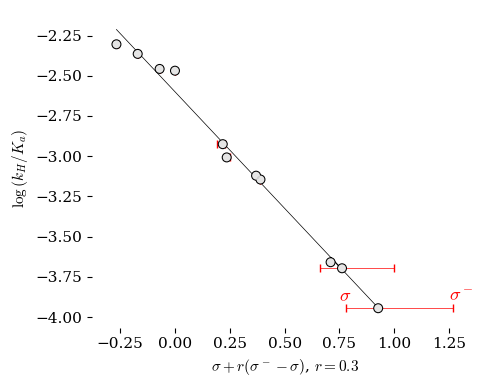

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")


#Filename = github_location_LFER_tables + LFER_Data
Filename = result_file_name        ### Use when working file is being stored locally


df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

display(df)


sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kH"  # "Ka", "kOH", "kH2O", "kH"

r = 0.30
#x = df[sigmatype]  
x = df["sigma"]+r*(df["s_minus"]-df["sigma"])

y = np.log10(df["kHKa"])   # in this case we are using kH/Ka since they depend upon each other.



style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

x_label = r"$\sigma + r(\sigma^--\sigma)$, $r = "+str(r)+r"$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=r"$\log{(k_{H}/K_a})$", 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.1, zorder=3)

ax.scatter(df["sigma"],y, color="red", marker='|', zorder=2)
ax.scatter(df["s_minus"],y, color="red", marker='|', zorder=2)

################################################################################
### get fancy and add horizontal lines to connect alternate points with hammett sigma points.
################################################################################

if True:                  # An easy switch to turn this on or off. 'True' for on, 'False' for off.
    for n in df.index:
        yhline = y[n]
        start = df["s_minus"][n]
        end = df["sigma"][n]
        ax.hlines(yhline, start, end, 
                  color='red', zorder=0, linewidth=0.5)

ax.text(0.75,-3.9,r"$\sigma$", size = "large", color = "red")
ax.text(1.25,-3.9,r"$\sigma^-$", size = "large", color = "red")

Report(column, linfit)   # use the 'Report' function to output the line fit parameters

fig.savefig("images/plotYK_kH.pdf")   # use this to save the figure in PDF format
plt.show()


## Determine Yukawa-Tsuno *r*-Value

the code below uses the y-data and determines a set of $\sigma$ values based on blending $\sigma$ and $\sigma^-$ values using the Yukawa-Tsuno method.

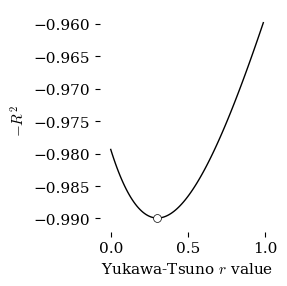

The optimal value for r is 0.303 for rsq = -0.98993


In [ ]:
# YUKAWA-TSUNO DETERMINATION

from scipy.optimize import minimize_scalar

def RSQ_function(r):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    x = df["sigma"]+r*(df["s_minus"]-df["sigma"])
    linfit = linregress(x,y)    # y is the set of y values from above
    return -(linfit.rvalue**2)


##########################################################
### Calculate the value of -RSQ as the value of r is varied 
##########################################################

rsq_range=[]
r_range = np.arange(0,1,0.01)
for r in r_range:
    rsq = RSQ_function(r)
    rsq_range.append(rsq)

##########################################################
### Plot the value of -RSQ as the value of r is varied 
##########################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
ax.set(ylabel=r"$-R^2$", 
       xlabel=r"Yukawa-Tsuno $r$ value")

ax.plot(r_range,rsq_range)

r_opt = minimize_scalar(RSQ_function)

ax.scatter(r_opt['x'],r_opt['fun'], s=32, color="white", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

fig.savefig("images/plotYK_kH_r.pdf")   # use this to save the figure in PDF format
plt.show()

##################################################
### Determine optimal r value to minimize -RSQ 
##################################################

print(f"The optimal value for r is {r_opt['x']:0.3f} for rsq = {r_opt['fun']:0.5f}")